In [1]:
'''prepare data for spotify and librosa extracted features for train and test'''
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, Imputer, LabelEncoder

In [2]:
def read_data_combined(datafile,selected_features=None):
    data = pd.read_csv(datafile)
    if selected_features is not None:
        feature = data.loc[:,selected_features]
    else:
        feature = pd.concat([data.loc[:,'tempo':'frame_std'],data.loc[:,'sp_energy':'sp_loudness']],axis=1)
    labels = data.loc[:, 'class']
    scaler = StandardScaler()
    features_scaled = scaler.fit(feature).transform(feature)
    return features_scaled, labels

In [3]:
'''test read data with selected features'''
data = './trainingdata_both/trainingdata_both_pruned.csv'
selected_features = ['mfcc_delta_mean','mfcc_delta_var','mfcc_delta_std']
feature,label = read_data_combined(data,selected_features)
print("one============")
print(feature[0])

one============
[-1.19337606  0.64954733  0.7450508 ]


In [4]:
'''test read data all features, i.e. take all features extracted'''
data = './trainingdata_both/trainingdata_both_pruned.csv'
feature,label = read_data_combined(data)
print("one============")
print(feature[0])
print(len(feature[0]))

one============
[-1.86896981 -1.75114111 -0.51761889 -0.55840625  0.11202342  0.0966886
 -1.65852034  1.18779059  1.23574879 -1.86398251  1.56328275  1.79019512
  0.95430848  1.45467692  1.54435954  0.42781415  0.70620907  0.58590686
 -1.19337606  0.7450508   0.64954733  0.78652969  0.71965545  0.58208634
 -1.82847036 -0.96009105 -0.92304106 -2.00833215 -0.39958228 -0.4796938
  1.83816873  5.27258004  5.87139585 -1.94313433 -0.75247351 -0.759121
 -0.10002132 -0.18896863 -0.36569806  1.44520874  1.55815309  1.77875494
 -1.39227913 -0.87243528 -0.86263484  0.06304455  1.57266515  1.83989984
 -0.2886468  -0.54562271 -0.62378217 -0.84114856 -0.80144362 -1.79615477
 -0.58262097 -0.23462449 -1.1993562   1.96345394 -0.32125977 -0.8808215
 -0.52864787 -1.45460093]
62


highest k is:  7
highest score is:  71.42857142857143


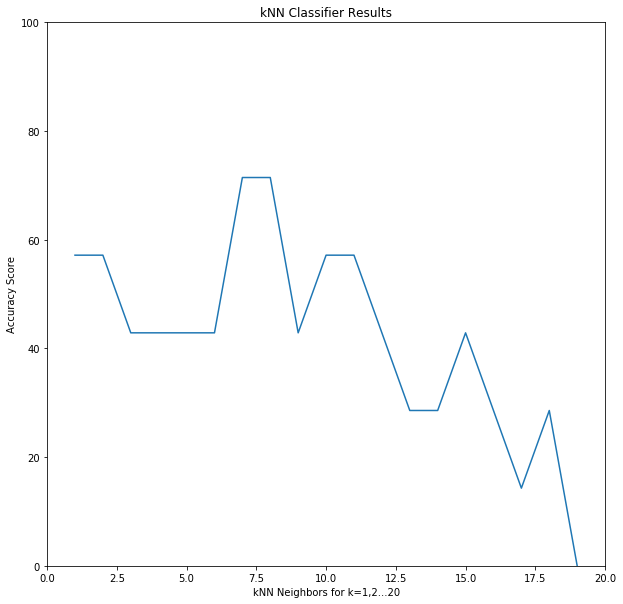

In [5]:
'''
    Using KNN model with all features
'''
data = './trainingdata_both/trainingdata_both_pruned.csv'

feature, label = read_data_combined(data)

test_size = 0.10
random_seed = 42
train_d, test_d, train_l, test_l = train_test_split(feature, label, test_size=test_size, random_state=random_seed)

result = []
xlabel = [i for i in range(1, 20)]
highest_k1 = 0
highest_score1 = 0
for neighbors in range(1, 20):
    kNN = KNeighborsClassifier(n_neighbors=neighbors)
    kNN.fit(train_d, train_l)
    prediction = kNN.predict(test_d)
    score = accuracy_score(prediction, test_l)*100
    result.append(score)
    if score > highest_score1:
        highest_score1 = score
        highest_k1 = neighbors
        
print("highest k is: ", highest_k1) 
print("highest score is: ", highest_score1)

plt.figure(figsize=(10, 10))
plt.xlabel('kNN Neighbors for k=1,2...20')
plt.ylabel('Accuracy Score')
plt.title('kNN Classifier Results')
plt.ylim(0, 100)
plt.xlim(0, xlabel[len(xlabel)-1]+1)
plt.plot(xlabel, result)
plt.savefig('Combined-knn-allfeatures.png')
plt.show()

highest k is:  7
highest score is:  71.42857142857143


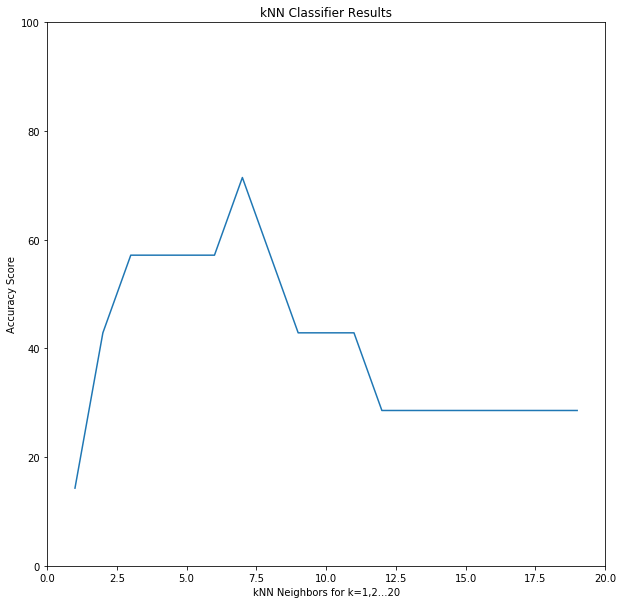

In [6]:
'''
    Using KNN model with selected features
'''
data = './trainingdata_both/trainingdata_both_pruned.csv'

selected_features = [#'tempo',
                     #'total_beats',
                     'chroma_cens_mean','chroma_cens_std','chroma_cens_var',
                     'mfcc_mean','mfcc_var','mfcc_std',
                     'cent_var','cent_mean','cent_std',
                     'contrast_mean','contrast_var','contrast_std',
                     'rolloff_mean','rolloff_std','rolloff_var',
#                      'zcr_mean','zcr_std','zcr_var',
                     'sp_energy',
                     'sp_valence',
                     'sp_danceability',
                     #'sp_tempo',
                     #'sp_speechiness',
#                      'sp_acousticness',
                     #'sp_instrumentalness',
                     'sp_liveness',
                     'sp_loudness'
                    ]
feature,label = read_data_combined(data,selected_features)

test_size = 0.10
random_seed = 42
train_d, test_d, train_l, test_l = train_test_split(feature, label, test_size=test_size, random_state=random_seed)

result = []
xlabel = [i for i in range(1, 20)]
highest_k2 = 0
highest_score2 = 0
for neighbors in range(1, 20):
    kNN = KNeighborsClassifier(n_neighbors=neighbors)
    kNN.fit(train_d, train_l)
    prediction = kNN.predict(test_d)
    score = accuracy_score(prediction, test_l)*100
    result.append(score)
    if score > highest_score2:
        highest_score2 = score
        highest_k2 = neighbors
        
print("highest k is: ", highest_k2) 
print("highest score is: ", highest_score2)

plt.figure(figsize=(10, 10))
plt.xlabel('kNN Neighbors for k=1,2...20')
plt.ylabel('Accuracy Score')
plt.title('kNN Classifier Results')
plt.ylim(0, 100)
plt.xlim(0, xlabel[len(xlabel)-1]+1)
plt.plot(xlabel, result)
plt.savefig('Combined-knn-selectedfeatures.png')
plt.show()

In [7]:
'''KNN model with cross validation -- all features'''
data = './trainingdata_both/trainingdata_both_pruned.csv'
feature,label = read_data_combined(data)
clf = KNeighborsClassifier(n_neighbors = highest_k1)
scores = cross_val_score(clf,feature,label,cv=5)
print(scores.mean())

0.35


In [8]:
'''KNN model with cross validation -- selected features'''
data = './trainingdata_both/trainingdata_both_pruned.csv'
feature,label = read_data_combined(data,selected_features)
clf = KNeighborsClassifier(n_neighbors = highest_k2)
scores = cross_val_score(clf,feature,label,cv=5)
print(scores.mean())

0.3358974358974359


In [9]:
'''Using SVC model with all features'''
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

data = './trainingdata_both/trainingdata_both_pruned.csv'
feature, label = read_data_combined(data)

x_for_kfold = feature
kfold = KFold(n_splits = 5)
train_index_start = []
train_index_end = []
test_index_start =[]
test_index_end = []
for train_indices, test_indices in kfold.split(x_for_kfold):
    print('Train: %s | Test %s' % (train_indices, test_indices))
    train_index_start.append(train_indices[0])
    train_index_end.append(train_indices[-1])
    test_index_start.append(test_indices[0])
    test_index_end.append(test_indices[-1])

for i1, i2, i3, i4 in zip(train_index_start, train_index_end, test_index_start, test_index_end):
    train_d = feature[i1:i2+1]
    train_l = label[i1:i2+1]
    test_d = feature[i3:i4+1]
    test_l = label[i3:i4+1]
    clf = SVC()
    clf.fit(train_d, train_l)
    hyp = clf.predict(test_d)
    print('Accuracy:', accuracy_score(test_l, hyp))

Train: [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61] | Test [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61] | Test [13 14 15 16 17 18 19 20 21 22 23 24 25]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61] | Test [26 27 28 29 30 31 32 33 34 35 36 37]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 50 51 52 53 54 55 56 57 58 59
 60 61] | Test [38 39 40 41 42 43 44 45 46 47 48 49]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] | Test [50 51 5

In [10]:
'''Using SVC model with selected features'''
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold


data = './trainingdata_both/trainingdata_both_pruned.csv'
feature,label = read_data_combined(data,selected_features)

x_for_kfold = feature
kfold = KFold(n_splits = 5)
train_index_start = []
train_index_end = []
test_index_start =[]
test_index_end = []
for train_indices, test_indices in kfold.split(x_for_kfold):
    print('Train: %s | Test %s' % (train_indices, test_indices))
    train_index_start.append(train_indices[0])
    train_index_end.append(train_indices[-1])
    test_index_start.append(test_indices[0])
    test_index_end.append(test_indices[-1])

for i1, i2, i3, i4 in zip(train_index_start, train_index_end, test_index_start, test_index_end):
    train_d = feature[i1:i2+1]
    train_l = label[i1:i2+1]
    test_d = feature[i3:i4+1]
    test_l = label[i3:i4+1]
    clf = SVC()
    clf.fit(train_d, train_l)
    hyp = clf.predict(test_d)
    print('Accuracy:', accuracy_score(test_l, hyp))

Train: [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61] | Test [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61] | Test [13 14 15 16 17 18 19 20 21 22 23 24 25]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61] | Test [26 27 28 29 30 31 32 33 34 35 36 37]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 50 51 52 53 54 55 56 57 58 59
 60 61] | Test [38 39 40 41 42 43 44 45 46 47 48 49]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] | Test [50 51 5

In [11]:
'''SVC using seperate test data with all features'''
traindata = './trainingdata_both/trainingdata_both_pruned.csv'
trainfeature,trainlabel = read_data_combined(traindata)
testdata = './testdata/testdata_both.csv'
testfeature,testlabel = read_data_combined(testdata)
clf = SVC()
clf.fit(trainfeature, trainlabel)
hyp = clf.predict(testfeature)
print('Accuracy:', accuracy_score(testlabel, hyp))

Accuracy: 0.4444444444444444


In [12]:
'''SVC using seperate test data with selected features'''
traindata = './trainingdata_both/trainingdata_both_pruned.csv'
trainfeature,trainlabel = read_data_combined(traindata,selected_features)
testdata = './testdata/testdata_both.csv'
testfeature,testlabel = read_data_combined(testdata,selected_features)
clf = SVC()
clf.fit(trainfeature, trainlabel)
hyp = clf.predict(testfeature)
print('Accuracy:', accuracy_score(testlabel, hyp))

Accuracy: 0.4444444444444444


In [13]:
'''Using Decision Tree with all features'''
# Create a decision tree and cross-validate for accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

traindata = './trainingdata_both/trainingdata_both_pruned.csv'
trainfeature,trainlabel = read_data_combined(traindata)
testdata = './testdata/testdata_both.csv'
testfeature,testlabel = read_data_combined(testdata)

folds=5
grid_params = {'criterion':('entropy', 'gini'), 'max_depth': [2, 3, 4, 5, 6]}

decision_tree = DecisionTreeClassifier()
classifier = GridSearchCV(decision_tree, grid_params, cv=folds)
classifier.fit(trainfeature, trainlabel)
hyp = classifier.predict(testfeature)
print(classifier.best_score_)
print(classifier.best_estimator_)
print("Accuracy score using decision_tree: %0.4f" %(accuracy_score(testlabel,hyp)))

0.43548387096774194
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy score using decision_tree: 0.4444


In [14]:
'''Using Decision Tree with selected features'''
# Create a decision tree and cross-validate for accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

traindata = './trainingdata_both/trainingdata_both_pruned.csv'
trainfeature,trainlabel = read_data_combined(traindata,selected_features)
testdata = './testdata/testdata_both.csv'
testfeature,testlabel = read_data_combined(testdata,selected_features)

folds=5
grid_params = {'criterion':('entropy', 'gini'), 'max_depth': [2, 3, 4, 5, 6]}

decision_tree = DecisionTreeClassifier()
classifier = GridSearchCV(decision_tree, grid_params, cv=folds)
classifier.fit(trainfeature, trainlabel)
hyp = classifier.predict(testfeature)
print(classifier.best_score_)
print(classifier.best_estimator_)
print("Accuracy score using decision_tree: %0.4f" %(accuracy_score(testlabel,hyp)))

0.5161290322580645
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy score using decision_tree: 0.5556


In [15]:
'''Using Random Forest with all features'''

traindata = './trainingdata_both/trainingdata_both_pruned.csv'
trainfeature,trainlabel = read_data_combined(traindata)
testdata = './testdata/testdata_both.csv'
testfeature,testlabel = read_data_combined(testdata)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfclf = RandomForestClassifier()
rfclf.fit(trainfeature, trainlabel)
hyp = rfclf.predict(testfeature)
print('Accuracy score using random forest: %0.4f' % (accuracy_score(testlabel,hyp)))

from xgboost import XGBClassifier
xgbclf = XGBClassifier()#tune xgb classifier
xgbclf.fit(trainfeature, trainlabel)
hyp = xgbclf.predict(testfeature)
print("Accuracy score using gradient boosting: %0.4f" %(accuracy_score(testlabel,hyp)))

from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(trainfeature, trainlabel)
hyp = clf.predict(testfeature)
print("Accuracy score using adaboosting: %0.4f" %(accuracy_score(testlabel,hyp)))

Accuracy score using random forest: 0.3333
Accuracy score using gradient boosting: 0.6667
Accuracy score using adaboosting: 0.2222


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [16]:
'''Using Random Forest with selected features'''

traindata = './trainingdata_both/trainingdata_both_pruned.csv'
trainfeature,trainlabel = read_data_combined(traindata,selected_features)
testdata = './testdata/testdata_both.csv'
testfeature,testlabel = read_data_combined(testdata,selected_features)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfclf = RandomForestClassifier()
rfclf.fit(trainfeature, trainlabel)
hyp = rfclf.predict(testfeature)
print('Accuracy score using random forest: %0.4f' % (accuracy_score(testlabel,hyp)))

from xgboost import XGBClassifier
xgbclf = XGBClassifier()#tune xgb classifier
xgbclf.fit(trainfeature, trainlabel)
hyp = xgbclf.predict(testfeature)
print("Accuracy score using gradient boosting: %0.4f" %(accuracy_score(testlabel,hyp)))

from sklearn.ensemble import AdaBoostClassifier
abclf = AdaBoostClassifier()
abclf.fit(trainfeature, trainlabel)
hypab = abclf.predict(testfeature)
print("Accuracy score using adaboosting: %0.4f" %(accuracy_score(testlabel,hypab)))

Accuracy score using random forest: 0.4444
Accuracy score using gradient boosting: 0.5556
Accuracy score using adaboosting: 0.2222


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [26]:
trainfeature, trainlabel = read_data_combined('./trainingdata_both/trainingdata_both_pruned.csv')

demodata = pd.read_csv('./DemoData/demodata_both.csv')
songnames = demodata.loc[:,'song_name']
demofeature = pd.concat([demodata.loc[:,'tempo':'frame_std'],demodata.loc[:,'sp_energy':'sp_loudness']],axis=1)
scaler = StandardScaler()
demofeatures_scaled = scaler.fit(demofeature).transform(demofeature)
print(songnames)
kNNboth = KNeighborsClassifier(n_neighbors=7)
kNNboth.fit(trainfeature, trainlabel)
kNNprediction = kNNboth.predict(demofeatures_scaled)
print ("result with knn {}".format(kNNprediction))

0             Dream a Little Dream of Me - Zee Avi.mp3
1                            Jessie J - Flashlight.mp3
2                                birdy - tee shirt.mp3
3    Bang Bang - Jessie J,Ariana Grande,Nicki Minaj...
Name: song_name, dtype: object
result with knn ['relax' 'sad' 'relax' 'angry']


In [28]:
DTclf = DecisionTreeClassifier()
DTclf.fit(trainfeature, trainlabel)
DThyp = DTclf.predict(demofeatures_scaled)
print ("result with knn {}".format(DThyp))

result with knn ['relax' 'angry' 'sad' 'angry']
